In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import timeit
import faiss

import surface

In [3]:
molecules_npydir = "/auto/datasets/npi/raw/01-benchmark_surfaces_npy"
gen = os.walk(molecules_npydir)
root, dirs, files = tuple(next(gen))
xyz_files_itr = filter(lambda x: x.rpartition("_")[2] == "atomxyz.npy", files)
names = list(map(lambda x: x.rpartition("_")[0], xyz_files_itr))
natoms_of = {}
for name in names:
    coords = np.load(f"{molecules_npydir}/{name}_atomxyz.npy")
    #natoms_of[name] = coords.shape[0]
    #print(name, coords.shape[0])

In [51]:
items = list(natoms_of.items())
items.sort(key = lambda x: x[1])
print(items)

[('1y1y_P', 4), ('1y1y_T', 7), ('3pa0_CD', 8), ('173d_D', 14), ('3pgw_DM', 16), ('3go3_CD', 20), ('1xvr_DE', 20), ('5ytz_DF', 20), ('5yty_DF', 20), ('6l74_I', 22), ('6ymw_C', 23), ('6oy5_I', 23), ('4i2h_C', 24), ('173d_CD', 28), ('209d_C', 30), ('2d55_C', 30), ('316d_C', 30), ('2d7h_E', 31), ('1g3x_M', 32), ('2dwn_E', 32), ('2dwm_E', 33), ('5k83_I', 34), ('2ok0_D', 35), ('5zkm_B', 36), ('6s0m_C', 36), ('2x1a_B', 36), ('2dwl_E', 37), ('1f0v_M', 38), ('7eh0_I', 39), ('4i2b_C', 39), ('6kcp_E', 40), ('1rh0_D', 40), ('6j7y_C', 40), ('2adw_JK', 40), ('1zn0_C', 40), ('1xf2_T', 41), ('2fdh_B', 41), ('2fdf_B', 41), ('2qfj_C', 41), ('2fd8_B', 41), ('4zhn_B', 41), ('1rxv_C', 41), ('2fdi_B', 41), ('2fdk_B', 41), ('2fdg_B', 41), ('2d7g_EF', 42), ('5uh6_I', 42), ('5uh9_I', 42), ('6rcn_C', 42), ('5x21_I', 42), ('4a3g_P', 42), ('4a3j_P', 42), ('1qln_R', 46), ('3u7h_X', 47), ('4jzu_C', 49), ('1rgt_D', 50), ('1rfi_D', 50), ('1rg1_D', 51), ('1rff_D', 51), ('4jzv_C', 51), ('2da8_A', 52), ('1rg2_D', 52), (

In [2]:
RADIUS = {}
with open("atomtype.txt") as f:
    for line in f.readlines()[1:]:
        atom = line.split()[0]
        RADIUS[atom] = line.split()[-2]

In [7]:

names = ["3qgc_B", "4yhx_BC", "5onw_IJ", "2zjr_XY"]
name = "3qgc_B"
molecules_npydir = "/auto/datasets/npi/raw/01-benchmark_surfaces_npy"
coords = np.load(f"{molecules_npydir}/{name}_atomxyz.npy")
types = np.load(f"{molecules_npydir}/{name}_atomtypes.npy")
rs = np.array(list(map(lambda x: RADIUS[x], types)), dtype = float)
print(len(rs))
R = max(rs) + 10
print(R)
d = coords.shape[1]

90626
10.374177


In [8]:
start_time = timeit.default_timer()
points, atoms_ids = surface.points_with_atomsid(coords, rs, additional_rad = 10)
time = timeit.default_timer() - start_time
print("Total time =", time)
print(len(points))
#print(atoms_ids)


search_neighbours_time:  14.290272769518197 4.48125305101126 %
search_points_time:  304.59983691293746 95.51874694898873 %
Total time = 319.18979278206825
86795


In [5]:
help(index.range_search)

Help on method replacement_range_search in module faiss.class_wrappers:

replacement_range_search(x, thresh, *, params=None) method of faiss.swigfaiss_avx2.IndexFlatL2 instance
    Search vectors that are within a distance of the query vectors.
    
    Parameters
    ----------
    x : array_like
        Query vectors, shape (n, d) where d is appropriate for the index.
        `dtype` must be float32.
    thresh : float
        Threshold to select neighbors. All elements within this radius are returned,
        except for maximum inner product indexes, where the elements above the
        threshold are returned
    params : SearchParameters
        Search parameters of the current search (overrides the class-level params)
    
    
    Returns
    -------
    lims: array_like
        Starting index of the results for each query vector, size n+1.
    D : array_like
        Distances of the nearest neighbors, shape `lims[n]`. The distances for
        query i are in `D[lims[i]:lims[i+1]

In [15]:
x = np.array([[1, 2, 3, 10], [4, 5, 6, 11], [7, 8, 9, 12]])
x.shape
mask = np.ones(x.shape[0], dtype=bool)
mask[[0, 2]] = False
x[mask]


array([[ 4,  5,  6, 11]])

In [2]:
point = np.array([0, 0])
R = 2
neighbours = np.array([[4.5, 0], [-5, 0], [0, -4.5], [0, 4.5]], float)
rs = np.array([4, 3, 3, 3], float)
res = surface.local_points(point, R, neighbours, rs)
res

[array([-1.52596836, -1.29283431])]

(-10.0, 10.0, -10.0, 10.0)

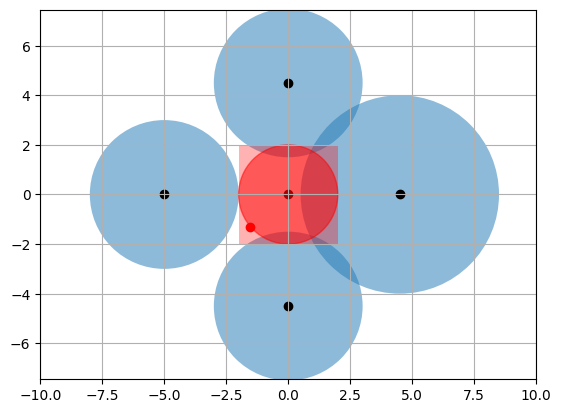

In [3]:
fig, ax = plt.subplots()
plt.axis("equal")
plt.grid()
for xyz, r in zip(neighbours, rs):
    c = plt.Circle (xyz, radius = r, alpha = 0.5)
    plt.gca().add_artist(c)
    plt.scatter(*xyz, color = "black")
plt.scatter(*point, color = "black")
for x in res:
    plt.scatter(*x, color = "red")
c = plt.Circle(point, radius = R, color = "red", alpha = 0.5)
plt.gca().add_artist(c)
plt.gca().add_patch(plt.Rectangle((point[0]-R, point[1]-R), 2 * R, 2 * R, facecolor = "red", alpha = 0.3))
plt.axis([-10, 10, -10, 10])